# Interleaved Randomized Benchmarking (IRB)

The interleaved randomized benchmarking routine allows us to estimate the gate fidelity of single
qubit Clifford gates. To demonstrate this routine, consider device noise modelled by an amplitude 
damping channel with decay probability $\gamma=0.01$

In [2]:
import cirq
import numpy as np
decay_prob = 0.01
noise = cirq.AmplitudeDampingChannel(gamma=decay_prob)
target = cirq.DensityMatrixSimulator(noise=noise)

It is known that an amplitude damping channel with decay probability $\gamma$ leads to a gate error
$$\frac13 + \frac{\gamma}{6} - \frac{\sqrt{1-\gamma}}{3}$$

In [3]:
expected_gate_error = 1/3 + decay_prob/6 - np.sqrt(1-decay_prob)/3

In [4]:
from cirq_superstaq.qcvv import IRB

experiment = IRB()
experiment.run(100, [1, 10, 25, 50, 75, 100], target=target)

Building circuits:   0%|          | 0/600 [00:00<?, ?it/s]

Simulating circuits:   0%|          | 0/1200 [00:00<?, ?it/s]

IRBResults(rb_layer_fidelity=0.9933663340897436, rb_layer_fidelity_std=5.841769504420766e-05, irb_layer_fidelity=0.9866314142548303, irb_layer_fidelity_std=0.00016249287958307833, average_interleaved_gate_error=0.003389947697938045, average_interleaved_gate_error_std=5.928307527842737e-07)

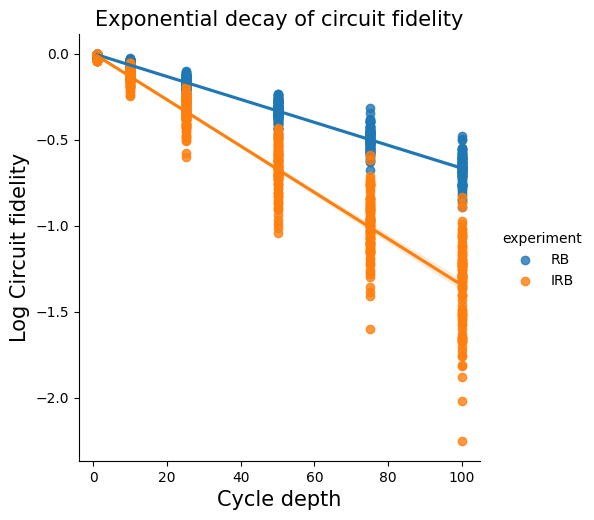

In [5]:
experiment.analyse_results()

In [6]:
print(f"Expected gate error: {expected_gate_error}")
print(f"Measured gate error: {experiment.results.average_interleaved_gate_error}")

Expected gate error: 0.0033375209644599946
Measured gate error: 0.003389947697938045
